In [ ]:
#pip install tensorflow opencv-python matplotlib scikit-learn
#sudo apt-get update
#sudo apt-get install -y python3-opencv

In [13]:
#import packages 
from tensorflow.keras.datasets import cifar10
import os 
import sys 
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


In [4]:
#load data in pre defined test and train set 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [2]:
def image_loader(load_fun):
    (X_train, y_train), (X_test, y_test) = load_fun
    return X_train, y_train, X_test, y_test

In [4]:
X_train, y_train, X_test, y_test = image_loader(cifar10.load_data())

Preprocessing: 
- function which returns a ndarray with shape 10000, 1024, 1, where each image has been: 
    - Turned to greyscale using cvtColor( , cv2.COLOR_BGR2GRAY)
    - Normalized by scaling colour channel value by max value (255)
    - Reshaped using .reshape(newshape)

In [5]:
def preprocess(images):

    #greyscale 
    greyed_shape = (images.shape[0:3])
    greyed_dtype = (images.dtype)
    images_grey = np.empty(shape = greyed_shape, dtype= greyed_dtype)    

    for i in range(0, len(images)):
        image = images[i][:,:,:]
        image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        images_grey[i] = image_grey

    #normalize 
    images_scaled = images_grey/255.0

    #reshape 
    preprocessed_images = images_scaled.reshape(-1, 1024)

    return preprocessed_images

In [6]:
X_test_pre = preprocess(X_test)
X_train_pre = preprocess(X_train)

In [17]:
#LR classifier 

def LR_classifier(X_prep_train, y_train, X_prep_test, y_test, outpath):

    fitted_classifier = LogisticRegression(random_state=42).fit(X_prep_train, y_train)
    y_pred = fitted_classifier.predict(X_prep_test)

    metrics_rep = metrics.classification_report(y_test, y_pred)

    filepath_metrics = open(outpath, 'w')
    filepath_metrics.write(metrics_rep)
    filepath_metrics.close()

In [ ]:
LR_classifier(X_train_pre, y_train, X_test_pre, y_test, 'out/LR_classification_rep.txt')

In [24]:
#mlp classifier
def MLP_classifier(X_prep_train, y_train):
    
    classifier = MLPClassifier(
                                activation = "logistic",
                                hidden_layer_sizes = (20,), 
                                max_iter=1000, 
                                random_state=42)

    fitted_classifier = classifier.fit(X_prep_train, y_train)

    return fitted_classifier

In [36]:
def evaluator(fitted_classifier, X_prep_test, y_test, outpath_report, outpath_losscurve):
    
    y_pred = fitted_classifier.predict(X_prep_test)

    metrics_rep = metrics.classification_report(y_test, y_pred)
    filepath_metrics = open(outpath_report, 'w')
    filepath_metrics.write(metrics_rep)
    filepath_metrics.close()

    plt.plot(fitted_classifier.loss_curve_)
    plt.title("Loss curve for MLP classifier")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.savefig(outpath_losscurve)    

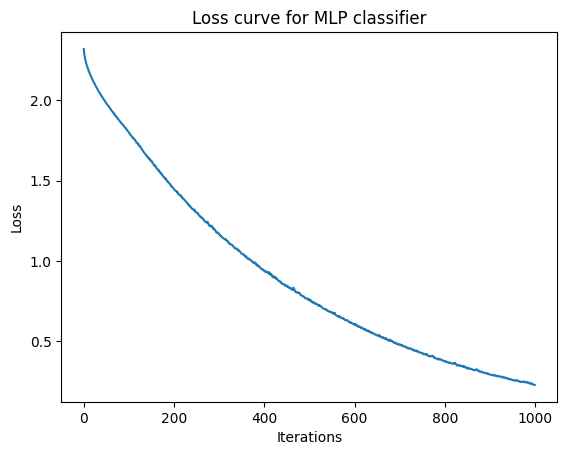

In [37]:
evaluator(mlp_small_fit2, X_test_pre_small, y_test_small, "test_rep", "test_loss")

In [ ]:
#labels 
